# Reproduction exemple chapitre 1 du livre Introduction to machine learning with Python

Commencer par importer le dataset et les librairies de bases

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display, Markdown as md
from sklearn.datasets import load_iris

iris_dataset = load_iris()

# Types de fleurs dans le datasets

In [3]:
nom_fleurs = iris_dataset['target_names']
print(nom_fleurs)

['setosa' 'versicolor' 'virginica']


## Variables décrivant les fleurs

In [4]:
feature_names = iris_dataset['feature_names']
print("Variable descriptives :",feature_names)


Variable descriptives : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Les données pour les cinq premières fleurs dans l'échantillon

In [5]:
print("Cinq premières lignes de data: \n{}".format(iris_dataset['data'][:5]))

Cinq premières lignes de data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
print("Cinq premières lignes de target: \n{}".format(iris_dataset['target'][:5]))

Cinq premières lignes de target: 
[0 0 0 0 0]


# Préparation du dataset pour le modèle prédictif

Pour pouvoir vérifier notre modèle, il faut séparer le dataset en deux parties. Une partie pour le training et l'autre pour le tester. Nous faisons ça avec la librairies sklearn qui a déjà une routine préparé pour ça. 75 % des données seront utilisées pour trainer le modèle et 25% pour le tester.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [8]:
print("X_train shape", X_train.shape)
print("Y_train shape", y_train.shape)

X_train shape (112, 4)
Y_train shape (112,)


In [9]:
print("X_test shape", X_test.shape)
print("Y_test shape", y_test.shape)

X_test shape (38, 4)
Y_test shape (38,)


# Regarder les données de façons qualitatives

Faire une matrice de scatterplot pour déterminer si notre modèle à des chances d'être efficace et déterminer s'il y a effectivement une relation entre les caractéristiques des fleurs et leur espèce.

In [10]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
iris_dataframe.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


In [11]:
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,5.886607,3.051786,3.796429,1.223214
std,0.871314,0.436196,1.800697,0.781427
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

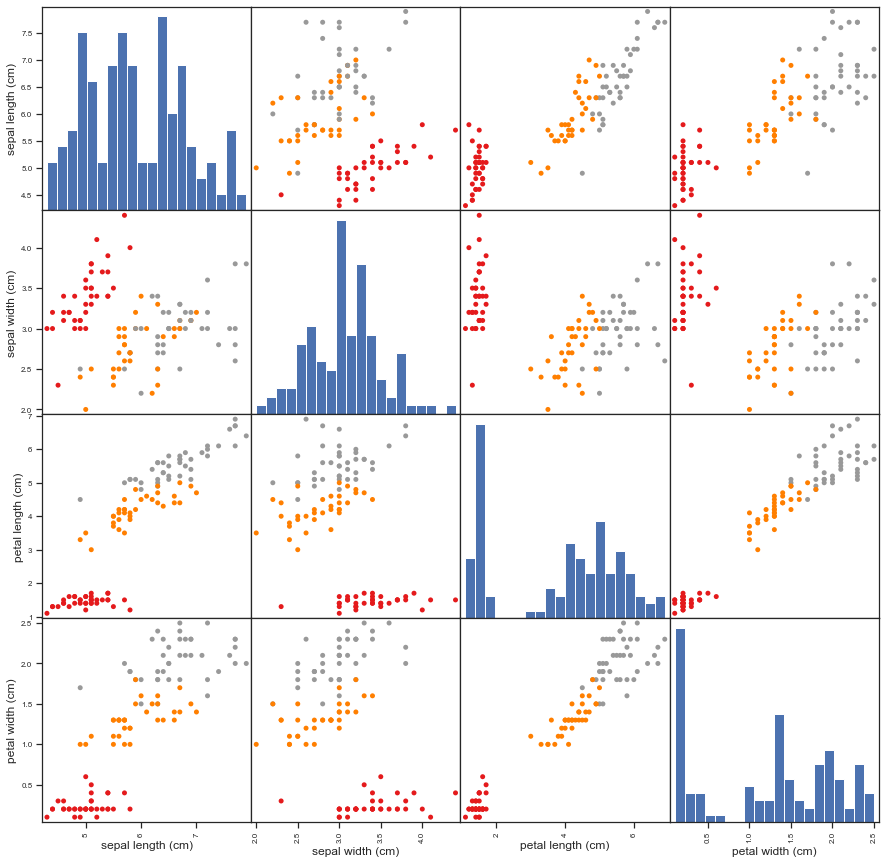

In [26]:
sns.set_theme(style = "ticks")
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize = (15,15), alpha = 1, 
                          hist_kwds = {'bins':20}, s=100, cmap ="Set1");

# K-nearest Neighbors
Ce modèle détermine à quel catégories nos données de test appartiennent en regardant à quelle catégorie son plus proche voisin dans le data set appartient. Plus la donnée de test a des caractéristiqus qui s'apparente a une donnée dans le dataset de training plus il y a de chances qu'elles appartiennent à la même catégorie.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Faire des prédictions à partir du modèle

In [38]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("La prédiction est {}".format(prediction))
print("Ce qui correspond à la fleur : {}".format(iris_dataset['target_names'][prediction]))

La prédiction est [0]
Ce qui correspond à la fleur : ['setosa']


## Évaluation du modèle

Étant donné que nous avons séparés nos données en deux catégories, il est possible de comparer à quel point nos prédictions par rapport aux données de test.

In [41]:
y_pred = knn.predict(X_test)
print("Prédictions : ",y_pred)

Prédictions :  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [46]:
precision = np.mean(y_pred == y_test)
print("Précision du test : {}%".format(round(precision * 100,2)))

Précision du test : 97.37%


Il aurait été aussi possible d'utiliser la fonction built in pour mesurer la précision du modèle.

In [62]:
score_test = round(knn.score(X_test,y_test) * 100,0)
print("Précision du test en utilisant la fonction incluse : {}%".format(score_test))

Précision du test en utilisant la fonction incluse : 97.0%
